<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/Keras-STP-BOD-Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [3]:
stp=pd.read_csv("STP.csv")
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  136 non-null    object 
 1   Influent BOD5         136 non-null    int64  
 2   Influent TSS          136 non-null    int64  
 3   Influent NH3          136 non-null    float64
 4   temperature           136 non-null    float64
 5   Influent pH           136 non-null    float64
 6   Influent Alkalinity   136 non-null    int64  
 7   Effluent BOD5         136 non-null    float64
 8   Effluent TSS          136 non-null    float64
 9   Effluent NH3          136 non-null    float64
 10  Aerobic NOx           136 non-null    float64
 11  Effluent pH           136 non-null    float64
 12  Field MLSS            136 non-null    float64
 13  Anoxic tank DO        136 non-null    float64
 14  Aerobic NH3           136 non-null    float64
 15  Aerobic DO            1

In [4]:
stp.pop('Influent TSS')
stp.pop('Effluent TSS')
stp.pop('Unnamed: 16')
stp.pop('Date')
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influent BOD5         136 non-null    int64  
 1   Influent NH3          136 non-null    float64
 2   temperature           136 non-null    float64
 3   Influent pH           136 non-null    float64
 4   Influent Alkalinity   136 non-null    int64  
 5   Effluent BOD5         136 non-null    float64
 6   Effluent NH3          136 non-null    float64
 7   Aerobic NOx           136 non-null    float64
 8   Effluent pH           136 non-null    float64
 9   Field MLSS            136 non-null    float64
 10  Anoxic tank DO        136 non-null    float64
 11  Aerobic NH3           136 non-null    float64
 12  Aerobic DO            136 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.9 KB


In [5]:
X=stp.drop(['Effluent BOD5'],axis=1).values
y=stp['Effluent BOD5'].values

In [33]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=23)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [34]:
X_train.shape, y_train.shape

((76, 12), (76,))

In [35]:
X_valid.shape, y_valid.shape

((26, 12), (26,))

In [36]:
X_test.shape, y_test.shape

((34, 12), (34,))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [38]:
np.random.seed(23)
tf.random.set_seed(23)

In [39]:
model = tf.keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [40]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [41]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("OptimumTrainedModel.h5",save_best_only=True)

In [42]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)

In [43]:
model_history=model.fit(X_train,y_train, epochs=900, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/900
3/3 [==============================] - 0s 69ms/step - loss: 20.6083 - mae: 3.6810 - val_loss: 13.9501 - val_mae: 3.3476
Epoch 2/900
3/3 [==============================] - 0s 11ms/step - loss: 19.1169 - mae: 3.4837 - val_loss: 12.8196 - val_mae: 3.1721
Epoch 3/900
3/3 [==============================] - 0s 11ms/step - loss: 17.8977 - mae: 3.3279 - val_loss: 11.6510 - val_mae: 2.9797
Epoch 4/900
3/3 [==============================] - 0s 12ms/step - loss: 16.6684 - mae: 3.1637 - val_loss: 10.6891 - val_mae: 2.8105
Epoch 5/900
3/3 [==============================] - 0s 16ms/step - loss: 15.6055 - mae: 3.0261 - val_loss: 9.6842 - val_mae: 2.6230
Epoch 6/900
3/3 [==============================] - 0s 13ms/step - loss: 14.4998 - mae: 2.8659 - val_loss: 8.8058 - val_mae: 2.4468
Epoch 7/900
3/3 [==============================] - 0s 16ms/step - loss: 13.5310 - mae: 2.7343 - val_loss: 8.0548 - val_mae: 2.2844
Epoch 8/900
3/3 [==============================] - 0s 13ms/step - loss: 12.6863

In [44]:
mae_test=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.6386 - mae: 1.2712


In [45]:
model_history.history

{'loss': [20.60826301574707,
  19.116907119750977,
  17.897705078125,
  16.668350219726562,
  15.6055269241333,
  14.499845504760742,
  13.530998229980469,
  12.686294555664062,
  11.756101608276367,
  10.836590766906738,
  10.11584186553955,
  9.539360046386719,
  8.977185249328613,
  8.49082088470459,
  8.107366561889648,
  7.718574047088623,
  7.450536727905273,
  7.1378173828125,
  6.8315510749816895,
  6.631074905395508,
  6.49240255355835,
  6.347743034362793,
  6.204919815063477,
  6.008172988891602,
  5.902791976928711,
  5.787360668182373,
  5.651617527008057,
  5.5942463874816895,
  5.509246826171875,
  5.404659748077393,
  5.350406646728516,
  5.264893054962158,
  5.202835559844971,
  5.174430847167969,
  5.10720682144165,
  5.067208290100098,
  5.011551856994629,
  4.957920551300049,
  4.914740085601807,
  4.884201526641846,
  4.818969249725342,
  4.7953996658325195,
  4.742367267608643,
  4.707355499267578,
  4.697808742523193,
  4.641961097717285,
  4.6080641746521,
  4.5

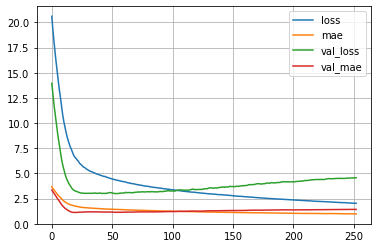

In [46]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [47]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[2.5035717],
        [5.4748325],
        [3.7059128],
        [3.852908 ],
        [2.9358702],
        [4.9658775],
        [4.455432 ],
        [4.4493237],
        [4.0813518],
        [3.4091666],
        [5.3361607],
        [4.2064004],
        [3.3393571],
        [4.0764065],
        [4.6953754],
        [2.844613 ],
        [5.282053 ],
        [5.3170185],
        [4.318102 ],
        [3.556596 ],
        [7.6716785],
        [5.918169 ],
        [6.7793827],
        [3.282142 ],
        [3.0775442],
        [3.81546  ],
        [7.132164 ],
        [2.9818983],
        [3.561593 ],
        [4.894866 ],
        [4.648525 ],
        [3.2514446],
        [3.9691489],
        [4.752921 ]], dtype=float32),
 array([2.95, 4.  , 2.  , 3.84, 2.  , 3.  , 1.  , 2.33, 5.  , 3.57, 2.  ,
        6.  , 4.  , 4.6 , 5.5 , 2.46, 3.  , 5.  , 4.  , 3.73, 4.  , 4.  ,
        4.5 , 3.87, 4.  , 5.  , 5.78, 3.5 , 4.  , 4.  , 4.2 , 1.26, 1.  ,
        4.5 ]))